# Voxelization

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import IPython.display
import PIL.Image

test_data_dir = "./test_data"

#### Visualization Configurations

In [2]:
# change to True if you want to interact with the visualization windows
interactive = not "CI" in os.environ

def jupyter_draw_geometries(
    geoms,
    window_name="Open3D",
    width=1920,
    height=1080,
    left=50,
    top=50,
    point_show_normal=False,
    mesh_show_wireframe=False,
    mesh_show_back_face=False,
    lookat=None,
    up=None,
    front=None,
    zoom=None,
):
    vis = o3d.visualization.Visualizer()
    vis.create_window(
        window_name=window_name,
        width=width,
        height=height,
        left=left,
        top=top,
        visible=True,  # If false, capture_screen_float_buffer() won't work.
    )
    vis.get_render_option().point_show_normal = point_show_normal
    vis.get_render_option().mesh_show_wireframe = mesh_show_wireframe
    vis.get_render_option().mesh_show_back_face = mesh_show_back_face
    for geom in geoms:
        vis.add_geometry(geom)
    if lookat is not None:
        vis.get_view_control().set_lookat(lookat)
    if up is not None:
        vis.get_view_control().set_up(up)
    if front is not None:
        vis.get_view_control().set_front(front)
    if zoom is not None:
        vis.get_view_control().set_zoom(zoom)
    if interactive:
        vis.run()
    else:
        for geom in geoms:
            vis.update_geometry(geom)
        vis.poll_events()
        vis.update_renderer()
    im = vis.capture_screen_float_buffer()
    vis.destroy_window()
    im = (255 * np.asarray(im)).astype(np.uint8)
    IPython.display.display(PIL.Image.fromarray(im, "RGB"))


o3d.visualization.draw_geometries = jupyter_draw_geometries

## Point Cloud

point cloud not exist in path: {test_data_dir}/cloud_bin_0.ply


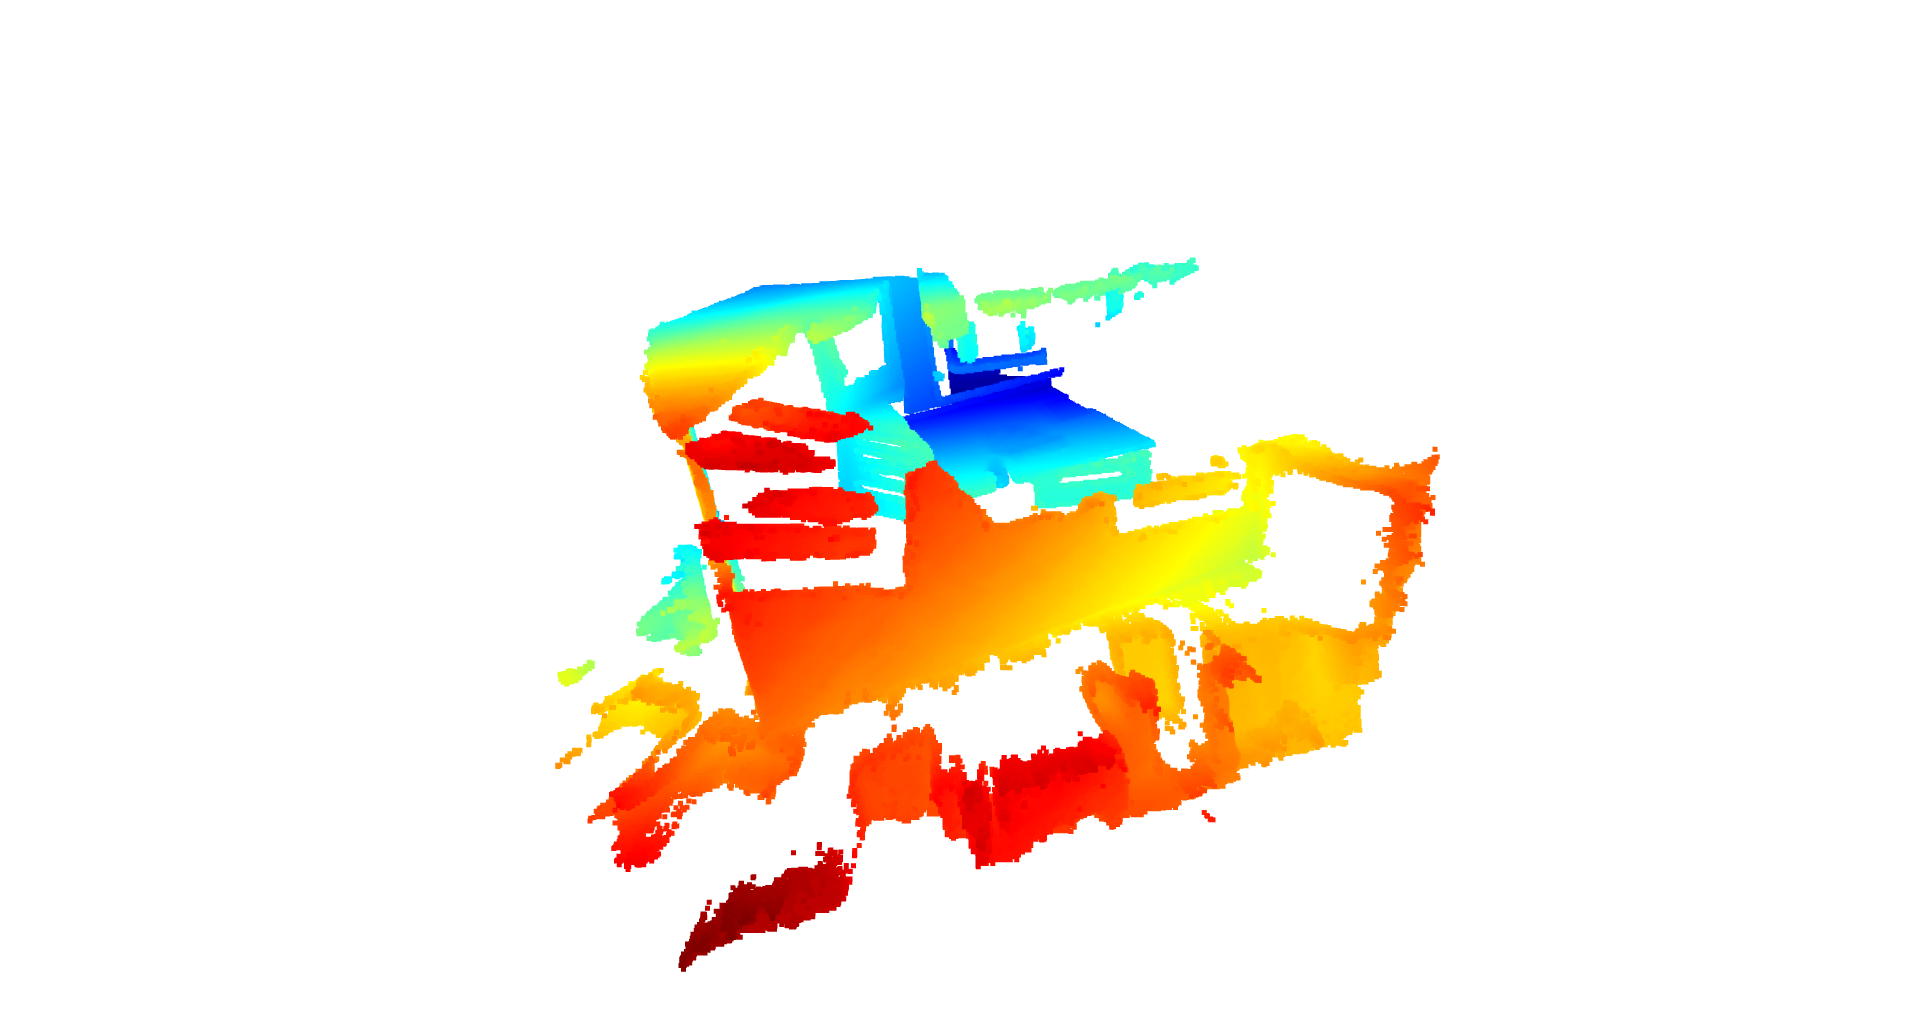

In [3]:
N = 1000
voxel_size = 0.02
pcd_path = "{test_data_dir}/cloud_bin_0.ply"
pcd = o3d.io.read_point_cloud(f"{test_data_dir}/cloud_bin_0.ply")

if not os.path.exists(pcd_path):
    print(f"point cloud not exist in path: {pcd_path}")
    quit()

# fit to unit cube
pcd.scale(1 / np.max(pcd.get_max_bound() - pcd.get_min_bound()),
          center=pcd.get_center())
pcd.colors = o3d.utility.Vector3dVector(np.random.uniform(0, 1, size=(N, 3)))
o3d.visualization.draw_geometries([pcd])

#### Downsample

In [ ]:
downpcd = pcd.voxel_down_sample(voxel_size=voxel_size)
o3d.visualization.draw_geometries([downpcd])

#### Voxelization

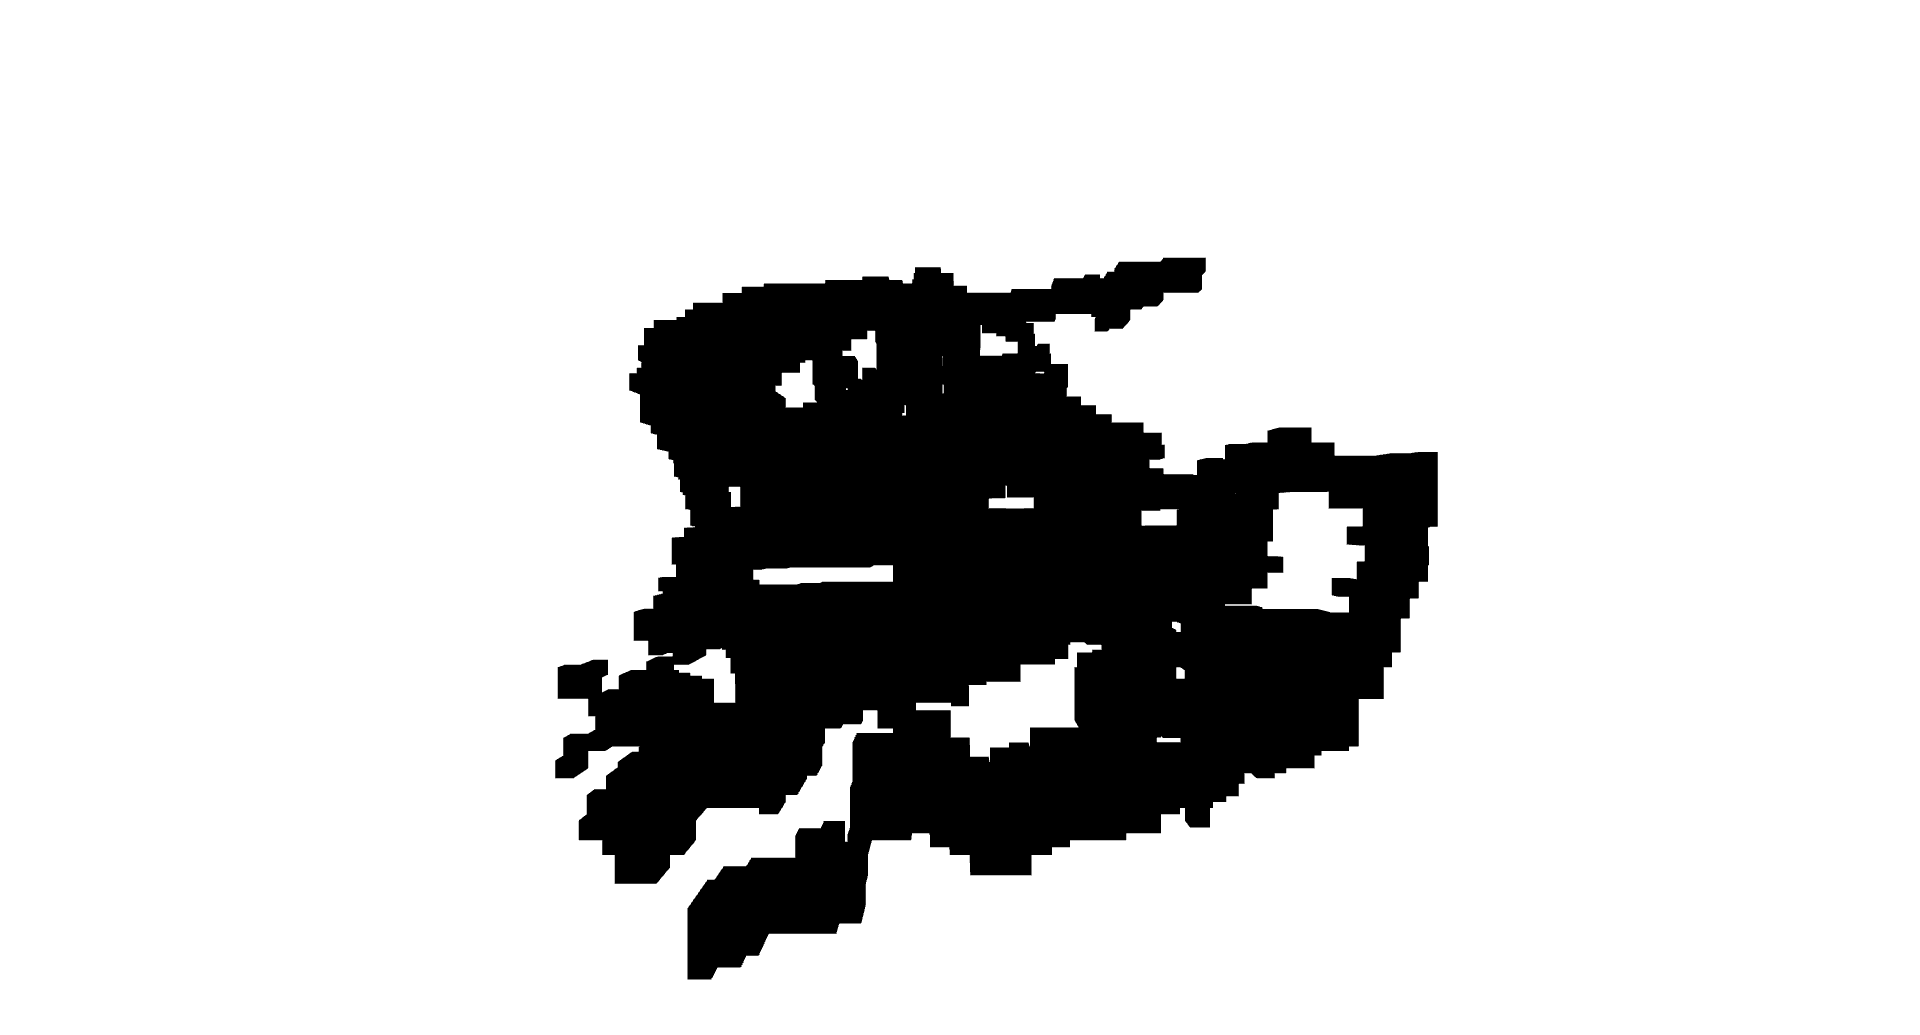

In [5]:
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd,
                                                            voxel_size=voxel_size)
o3d.visualization.draw_geometries([voxel_grid])

## Mesh

In [6]:
"""
mesh_path = "{test_data_dir}/cloud_bin_0_mesh.ply"
if not os.path.exists(mesh_path):
    print(f"mesh not exist in path{mesh_path}")
    quit()

mesh = o3d.io.read_triangle_mesh(mesh_path)
mesh.compute_vertex_normals()
# fit to unit cube
mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()),
           center=mesh.get_center())
o3d.visualization.draw_geometries([mesh])
"""

[Open3D WARNING] Read PLY failed: unable to open file: ./cloud_bin_0_mesh.ply


RuntimeError: [1;31m[Open3D ERROR] [CreateCoordinateFrame] size &lt;= 0[0;m

#### Voxelization

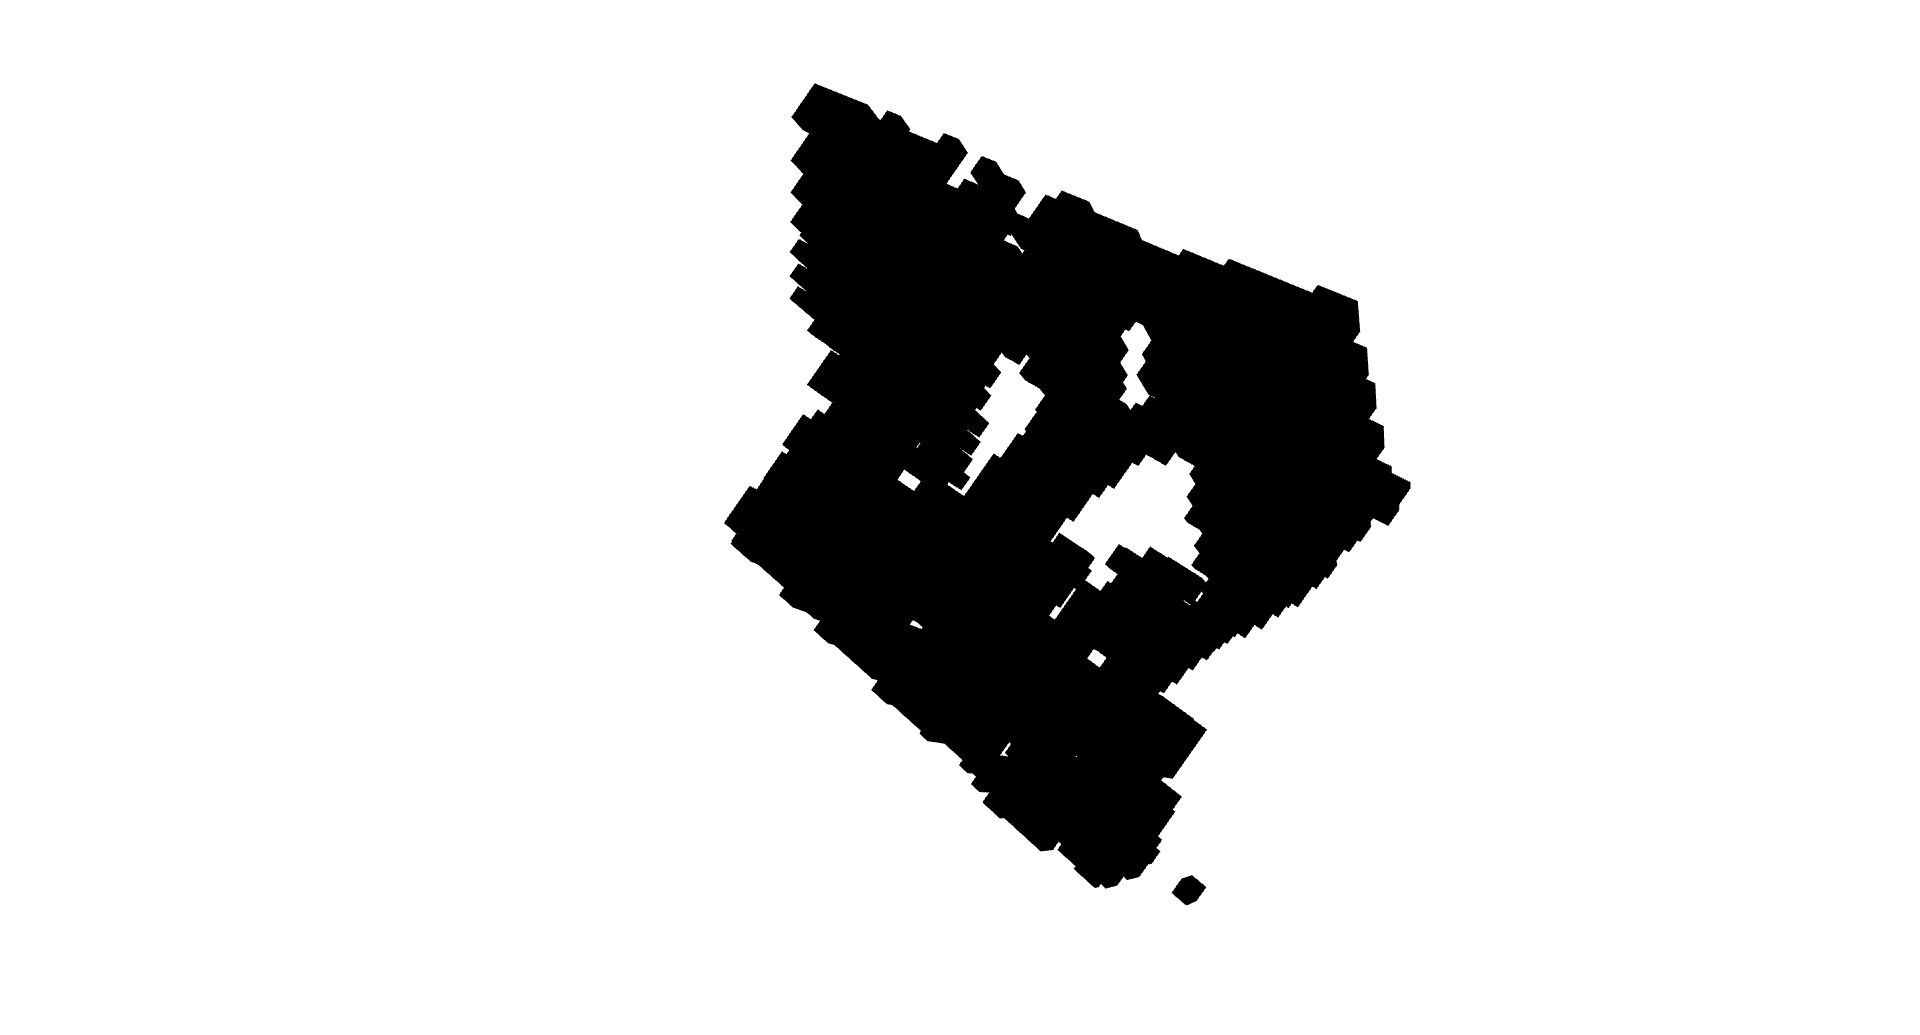

In [11]:
"""
voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh,
                                                              voxel_size=voxel_s)
o3d.visualization.draw_geometries([voxel_grid])
"""